In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**In this chapter**

- You learn about divide-and-conquer. Sometimes you’ll come across a problem that can’t be solved by any algorithm you’ve learned. When a good algorithmist comes across such a problem, they don’t just give up. They have a toolbox full of techniques they use on the problem, trying to come up with a solution. Divide-and-conquer is the first general technique you learn.                     
- You learn about quicksort, an elegant sorting algorithm that’s often used in practice. Quicksort uses divide-and-conquer.

> **在本章中**
>
> - 你学习分割与征服的知识。有时你会遇到一个你所学的任何算法都无法解决的问题。当一个好的算法师遇到这样的问题时，他们不会轻易放弃。他们有一个工具箱，里面装满了他们在这个问题上使用的技术，试图想出一个解决方案。分而治之是你学习的第一个通用技术。                    
> - 你学习的是quicksort，这是一种优雅的排序算法，在实践中经常使用。Quicksort使用分割与征服的方法。

You learned all about recursion in the last chapter. This chapter focuses on using your new skill to solve problems. We’ll explore *divide and conquer* (D&C), a well-known recursive technique for solving problems.

This chapter really gets into the meat of algorithms. After all, an algorithm isn’t very useful if it can only solve one type of problem. Instead, D&C gives you a new way to think about solving problems. D&C is another tool in your toolbox. When you get a new problem, you don’t have to be stumped. Instead, you can ask, “Can I solve this if I use divide and conquer?”

At the end of the chapter, you’ll learn your first major D&C algorithm: *quicksort*. Quicksort is a sorting algorithm, and a much faster one than selection sort (which you learned in [chapter 2](ms-local-stream://EpubReader_AC72D530066DA71DBA289EF8C2FE2E4D915D872E9F520716C4ECA9F5D94B14/Content/OEBPS/kindle_split_008.xhtml#ch02)). It’s a good example of elegant code.

> 你在上一章中学习了所有关于递归的知识。本章的重点是使用你的新技能来解决问题。我们将探讨*分割与征服*（D&C），这是一种著名的用于解决问题的递归技术。
>
> 这一章真正进入了算法的实质。毕竟，如果一个算法只能解决一种类型的问题，它就不是很有用。相反，D&C为你提供了一种思考解决问题的新方法。D&C是你工具箱中的另一个工具。当你遇到一个新的问题时，你不需要束手无策。相反，你可以问："如果我使用D&C，我能解决这个问题吗？"
>
> 在本章末尾，你将学习第一个主要的D&C算法。*quicksort*。Quicksort是一种排序算法，而且比选择排序（你在[第二章](ms-local-stream://EpubReader_AC72D530066DA71DBA289EF8C2FE2E4D915D872E9F520716C4ECA9F5D94B14/Content/OEBPS/kindle_split_008.xhtml#ch02)中学到的排序算法快很多。） 这是一个优雅代码的好例子。

## Divide & Conquer

D&C can take some time to grasp. So, we’ll do three examples. First I’ll show you a visual example. Then I’ll do a code example that is less pretty but maybe easier. Finally, we’ll go through quicksort, a sorting algorithm that uses D&C.

> D&C可能需要一些时间来掌握。因此，我们将做三个例子。首先，我将向你展示一个视觉上的例子。然后我将做一个不那么漂亮但可能更容易的代码例子。最后，我们将通过quicksort，一种使用D&C的排序算法。

Suppose you’re a farmer with a plot of land(168×64). You want to divide this farm evenly into *square* plots. You want the plots to be as big as possible. So none of these will work. How do you figure out the largest square size you can use for a plot of land? Use the D&C strategy! D&C algorithms are recursive algorithms. To solve a problem using D&C, there are two steps:

**1**. Figure out the base case. This should be the simplest possible case.      

**2**. Divide or decrease your problem until it becomes the base case.

> 假设你是一个拥有一块土地（168×64）的农民。你想把这块农场均匀地划分为*n*个正方形的地块。你希望这些地块越大越好。所以这些方法都行不通。你如何计算出你可以用在一块土地上的最大正方形尺寸？使用D&C策略! D&C算法是递归算法。要用D&C解决问题，有两个步骤。
>
> **1**. 弄清基本情况。这应该是最简单的情况。     
>
> **2**. 分割或减少你的问题，直到它成为基本情况。

Let’s use D&C to find the solution to this problem. What is the largest square size you can use?

> 让我们用D&C来寻找这个问题的解决方案。你能使用的最大正方形尺寸是多少？

First, figure out the base case. The easiest case would be if one side was a multiple of the other side.

Suppose one side is 25 meters (m) and the other side is 50 m. Then the largest box you can use is 25 m × 25 m. You need two of those boxes to divide up the land.      

Now you need to figure out the recursive case. This is where D&C comes in. According to D&C, with every recursive call, you have to reduce your problem. How do you reduce the problem here? Let’s start by marking out the biggest boxes you can use.

> 首先，弄清基本情况。最简单的情况是如果一条边是另一条边的倍数。
>
> 假设一条边是25米（m），另一条边是50米，那么你可以使用的最大的盒子是25米×25米，你需要两个这样的盒子来划分土地。     
>
> 现在你需要弄清楚递归的情况。这就是D&C的作用。根据D&C，每一次递归调用，你都要减少你的问题。你如何减少这里的问题呢？让我们从标记出你可以使用的最大的箱子开始。

You can fit two 640 × 640 boxes in there, and there’s some land still left to be divided. Now here comes the “Aha!” moment. There’s a farm segment left to divide. *Why don’t you apply the same algorithm to this segment?*

So you started out with a 1680 × 640 farm that needed to be split up. But now you need to split up a smaller segment, 640 × 400. If you *find the biggest box that will work for this size, that will be the biggest box that will work for the entire farm.* You just reduced the problem from a 1680 × 640 farm to a 640 × 400 farm!

> 你可以在那里装下两个640×640的盒子，而且还有一些土地有待分割。现在，"啊哈！"的时刻到了。还有一个农场段需要分割。*你为什么不把同样的算法应用到这一段呢？*
>
> 所以你开始时有一个1680×640的农场需要分割。但现在你需要分割一个更小的片段，640 × 400。如果你*找到对这个尺寸有效的最大的盒子，这将是对整个农场有效的最大的盒子。*你刚刚把问题从1680×640的农场减少到640×400的农场！

“If you find the biggest box that will work for this size, that will be the biggest box that will work for the entire farm.” If it’s not obvious to you why this statement is true, don’t worry. It isn’t obvious. Unfortunately, the proof for why it works is a little too long to include in this book, so you’ll just have to believe me that it works. If you want to understand the proof, look up Euclid’s algorithm. The Khan academy has a good explanation here: https://www.khanacademy.org/computing/computer-science/cryptography/modarithmetic/a/the-euclidean-algorithm.

> "如果你找到对这种规模有效的最大盒子，那将是对整个农场有效的最大盒子。" 如果你不明白为什么这句话是真的，不要担心。它并不明显。不幸的是，关于它为什么有效的证明有点太长了，不能写在这本书里，所以你只能相信我，它是有效的。如果你想了解这个证明，可以查一下欧几里得的算法。可汗学院在这里有一个很好的解释：https://www.khanacademy.org/computing/computer-science/cryptography/modarithmetic/a/the-euclidean-algorithm。

Let’s apply the same algorithm again. Starting with a 640 × 400m farm, the biggest box you can create is 400 × 400 m.

And that leaves you with a smaller segment, 400 × 240 m.

And you can draw a box on that to get an even smaller segment, 240 × 160 m.

And then you draw a box on that to get an even *smaller* segment.

Hey, you’re at the base case: 80 is a factor of 160. If you split up this segment using boxes, you don’t have anything left over!

Hey, you’re at the base case: 80 is a factor of 160. If you split up this segment using boxes, you don’t have anything left over! So, for the original farm, the biggest plot size you can use is 80 × 80 m.

> 让我们再次应用同样的算法。从一个640×400米的农场开始，你可以创建的最大方框是400×400米。
>
> 这就给你留下了一个更小的区段，400×240米。
>
> 你可以在上面画一个方框，得到一个更小的区段，240×160米。
>
> 然后你再在这上面画一个方框，得到一个更*小*的线段。
>
> 嘿，你是在基本情况下。80是160的一个系数。如果你用盒子来分割这一段，你就没有任何剩余的东西了！这就是你的想法。
>
> 嘿，你现在是在基本情况下。80是160的一个系数。如果你用箱子分割这一段，你就没有任何剩余的东西了! 所以，对于原来的农场，你可以使用的最大地块面积是80×80米。

To recap, here’s how D&C works:

1. Figure out a simple case as the base case.                     
2. Figure out how to reduce your problem and get to the base case.                      

D&C isn’t a simple algorithm that you can apply to a problem. Instead, it’s a way to think about a problem. Let’s do one more example.

> 简而言之，以下是D&C的工作方式。
>
> 1. 想出一个简单的案例作为基础案例。                    
> 2. 想出如何减少你的问题并达到基本情况。                     
>
> D&C并不是一个简单的算法，你可以应用于一个问题。相反，它是一种思考问题的方式。让我们再做一个例子。

You’re given an array of numbers. like: [2, 4, 6]; You have to add up all the numbers and return the total. It’s pretty easy to do this with a loop:

> 给你一个数字数组。比如。[2, 4, 6]; 你必须把所有的数字相加并返回总数。用一个循环来做这件事是很容易的。

In [2]:
def sum_up(arr):
    total = 0
    for i in arr:
        total += i
    return total

sum_up([2, 4, 6])

12

But how would you do this with a recursive function?

**Step 1:** Figure out the base case. What’s the simplest array you could get? Think about the simplest case, and then read on. If you get an array with 0 or 1 element, that’s pretty easy to sum up. So that will be the base case.

**Step 2:** You need to move closer to an empty array with every recursive call. How do you reduce your problem size? Here’s one way.

> 但你如何用一个递归函数来做这件事呢？
>
> **第1步：**弄清楚基本情况。你能得到的最简单的数组是什么？想一想最简单的情况，然后继续阅读。如果你得到一个有0或1个元素的数组，那就很容易总结了。所以这将是基本情况。
>
> **第二步：**你需要通过每次递归调用来接近一个空数组。你如何减少问题的大小呢？这里有一个方法。

It’s the same as this.

sum([2,4,5]) = 12; 2+sum([4,6]) = 2+10=12

In either case, the result is 12. But in the second version, you’re passing a smaller array into the sum function. That is, *you decreased the size of your problem!*

Your sum function could work like this.

> 这与此相同。
>
> sum([2,4,5]) = 12; 2+sum([4,6]) = 2+10=12
>
> 无论哪种情况，结果都是12。但在第二个版本中，你将一个较小的数组传入了sum函数。也就是说，*你减少了问题的大小！*。
>
> 你的求和函数可以这样工作。

In [5]:
# give a list, if the list is empty, return zero,\
# otherwise the total sum is the first number in the list + the sum of the rest of the list

def sum_up(arr):
    if len(arr) == 0:
        return 0
    else:
        return arr[0] + sum_up(arr[1:])
    
print(sum_up([2,4,6]))

12


**Tip**

When you’re writing a recursive function involving an array, the base case is often an empty array or an array with one element. If you’re stuck, try that first.

> 当你写一个涉及数组的递归函数时，基本情况往往是一个空数组或一个有一个元素的数组。如果你被卡住了，先试试这个。

**Sneak peak at functional programming**                  

“Why would I do this recursively if I can do it easily with a loop?” you may be thinking. Well, this is a sneak peek into functional programming! Functional programming languages like Haskell don’t have loops, so you have to use recursion to write functions like this. If you have a good understanding of recursion, functional languages will be easier to learn. For example,            here’s how you’d write a sum function in Haskell:

> **函数式编程初探**             
>
> 你可能在想："如果我可以用循环来做，为什么还要用递归来做呢？"好吧，这是对函数式编程的一次偷窥! 像Haskell这样的函数式编程语言是没有循环的，所以你必须使用递归来编写这样的函数。如果你对递归有很好的理解，函数式语言就会更容易学习。例如，这里是你如何在Haskell中写一个和函数。

Notice that it looks like you have two definitions for the function. The first definition is run when you hit the base case. The second definition runs at the recursive case. You can also write this function in Haskell using an if statement:

> 注意，看起来你有两个函数的定义。第一个定义是在你遇到基本情况时运行。第二个定义在递归情况下运行。你也可以在Haskell中使用if语句来写这个函数。

But the first definition is easier to read. Because Haskell makes heavy use of recursion, it includes all kinds of niceties like this to make recursion easy. If you like recursion, or you’re interested in learning a new language, check out Haskell.

> 但第一个定义更容易阅读。因为Haskell大量使用递归，它包括各种像这样的好处，使递归变得简单。如果你喜欢递归，或者你对学习一门新的语言感兴趣，可以去看看Haskell。

### Exercises

**4.1** 

Write out the code for the earlier sum function.            

**4.2** 

Write a recursive function to count the number of items in a list.

**4.3** 

Find the maximum number in a list.   

**4.4** 

Remember binary search from [chapter 1](ms-local-stream://EpubReader_AC72D530066DA71DBA289EF8C2FE2E4D915D872E9F520716C4ECA9F5D94B14/Content/OEBPS/kindle_split_007.xhtml#ch01)? It’s a divide-and-conquer algorithm, too. Can you come up with the base case and recursive case for binary search?

> **4.1** 
>
> 写出前面的和函数的代码。           
>
> **4.2** 
>
> 写一个递归函数来计算一个列表中的项目数。
>
> **4.3** 
>
> 找出一个列表中的最大数量。  
>
> **4.4** 
>
> Remember binary search from [chapter 1](ms-local-stream://EpubReader_AC72D530066DA71DBA289EF8C2FE2E4D915D872E9F520716C4ECA9F5D94B14/Content/OEBPS/kindle_split_007.xhtml#ch01)? 这也是一种分而治之的算法。你能想出二分查找的基本情况和递归情况吗？

In [4]:
# 4.1
def sum_up(arr):
    if len(arr) == 0:
        return 0
    else:
        return arr[0] + sum_up(arr[1:])

In [16]:
# 4.2
def count_elements(arr):
    if arr == []:
        return 0
    else:
        return 1 + count_elements(arr[1:])
    
print(count_elements([1,2,3,4]))

4


In [17]:
# 4.3 can't figure out now

In [18]:
# 4.4 the right number?

## Quicksort

Quicksort is a sorting algorithm. It’s much faster than selection sort and is frequently used in real life. For example, the C standard library has a function called qsort, which is its implementation of quicksort. Quicksort also uses D&C.

> Quicksort是一种排序算法。它比选择排序快得多，而且在现实生活中经常使用。例如，C语言标准库中有一个叫做qsort的函数，这是它对quicksort的实现。Quicksort也使用D&C。

Quicksort is a sorting algorithm. It’s much faster than selection sort and is frequently used in real life. For example, the C standard library has a function called qsort, which is its implementation of quicksort. Quicksort also uses D&C.

> Quicksort是一种排序算法。它比选择排序快得多，而且在现实生活中经常使用。例如，C语言标准库中有一个叫做qsort的函数，这是它对quicksort的实现。Quicksort也使用D&C。

Let’s use quicksort to sort an array. What’s the simplest array that a sorting algorithm can handle (remember my tip from the previous section)? Well, some arrays don’t need to be sorted at all.

Empty arrays and arrays with just one element will be the base case. You can just return those arrays as is—there’s nothing to sort:

> 让我们用quicksort来对一个数组进行排序。一个排序算法能处理的最简单的数组是什么（还记得我在上一节中的提示吗）？好吧，有些数组根本不需要被排序。
>
> 空数组和只有一个元素的数组将是基本情况。你可以按原样返回这些数组--没有什么可排序的。

In [2]:
def quicksort(array):
    if len(array) < 2:
        return array

Let’s look at bigger arrays. An array with two elements is pretty easy to sort, too. What about an array of three elements?

Remember, you’re using D&C. So you want to break down this array until you’re at the base case. Here’s how quicksort works. First, pick an element from the array. This element is called the *pivot.*

We’ll talk about how to pick a good pivot later. For now, let’s say the first item in the array is the pivot. Now find the elements smaller than the pivot and the elements larger than the pivot.

> 我们来看看更大的数组。一个有两个元素的数组也是很容易排序的。那么一个有三个元素的数组呢？
>
> 记住，你正在使用D&C。所以你要把这个数组分解，直到你在基本情况下。下面是quicksort的工作方法。首先，从数组中挑选一个元素。这个元素被称为*支点*。
>
> 我们稍后会讨论如何挑选一个好的支点。现在，让我们假设数组中的第一个项目是支点。现在找出比支点小的元素和比支点大的元素。

In [3]:
33 # the pivot
[15,10], 33, []

33

([15, 10], 33, [])

This is called *partitioning.* Now you have      

- A sub-array of all the numbers less than the pivot                     
- The pivot                     
- A sub-array of all the numbers greater than the pivot

> 这被称为*分区。*现在你有      
>
> - 一个包含所有小于枢轴的数字的子数组                     
> - 枢轴                     
> - 一个包含所有大于中枢的数字的子数组

The two sub-arrays aren’t sorted. They’re just partitioned. But if they *were* sorted, then sorting the whole array would be pretty easy.

If the sub-arrays are sorted, then you can combine the whole thing like this—left array + pivot + right array—and you get a sorted array. In this case, it’s [10, 15] + [33] + [] = [10, 15, 33], which is a sorted array.

How do you sort the sub-arrays? Well, the quicksort base case already knows how to sort arrays of two elements (the left sub-array) and empty arrays (the right sub-array). So if you call quicksort on the two sub-arrays and then combine the results, you get a sorted array!

> 这两个子数并没有被排序。它们只是被分区了。但是如果它们*是*排序的，那么对整个数组进行排序就非常容易了。
>
> 如果子数组是排序的，那么你就可以像这样把整个数组结合起来--左数组+中枢+右数组--你就得到了一个排序的数组。在这个例子中，它是[10, 15]+[33]+[]=[10, 15, 33]，这是一个排序的数组。
>
> 你如何对子数组进行排序？嗯，quicksort基例已经知道如何对两个元素的数组（左边的子数组）和空数组（右边的子数组）进行排序。因此，如果你在两个子数组上调用quicksort，然后将结果结合起来，你就得到了一个排序的数组

This will work with any pivot. Suppose you choose 15 as the pivot instead.

Both sub-arrays have only one element, and you know how to sort those. So now you know how to sort an array of three elements. Here are the steps:

**1**. Pick a pivot.                             

**2**. Partition the array into two sub-arrays: elements less than the pivot and elements greater than the pivot.                     

**3**. Call quicksort recursively on the two sub-arrays.

> 这将适用于任何枢轴。假设你选择15作为支点。
>
> 这两个子数组都只有一个元素，而且你知道如何对这些元素进行排序。所以现在你知道如何对一个有三个元素的数组进行排序。下面是步骤。
>
> **1**. 选择一个支点。                            
>
> **2**. 将数组分成两个子数组：小于支点的元素和大于支点的元素。                    
>
> **3**. 在这两个子数组上递归地调用quicksort。

What about an array of four elements? Suppose you choose 33 as the pivot again. The array on the left has three elements. You already know how to sort an array of three elements: call quicksort on it recursively. So you can sort an array of four elements. And if you can sort an array of four elements, you can sort an array of five elements. Why is that? Suppose you have this array of five elements. Here are all the ways you can partition this array, depending on what pivot you choose.

> 那么一个有四个元素的数组呢？假设你再次选择33作为支点。左边的数组有三个元素。你已经知道如何对三个元素的数组进行排序：递归地调用quicksort。所以你可以对一个四元素的数组进行排序。如果你能对一个四元素的数组进行排序，你就能对一个五元素的数组进行排序。为什么会这样呢？假设你有一个五个元素的数组。下面是你可以分割这个数组的所有方法，取决于你选择的枢轴。

Notice that all of these sub-arrays have somewhere between 0 and 4 elements. And you already know how to sort an array of 0 to 4 elements using quicksort! So no matter what pivot you pick, you can call quicksort recursively on the two sub-arrays.

> 请注意，所有这些子数组的元素都在0到4之间。而你已经知道如何使用quicksort对0到4个元素的数组进行排序了 因此，无论你选择什么支点，你都可以在两个子数组上递归地调用quicksort。

For example, suppose you pick 3 as the pivot. You call quicksort on the sub-arrays. The sub-arrays get sorted, and then you combine the whole thing to get a sorted array. This works even if you choose 5 as the pivot.

This works with any element as the pivot. So you can sort an array of five elements. Using the same logic, you can sort an array of six elements, and so on.

> 例如，假设你选择3作为支点。你在子数组上调用quicksort。子数组被排序，然后你将整个数组合并，得到一个排序的数组。即使你选择5作为支点，这也是有效的。
>
> 这在任何元素作为枢轴的情况下都有效。所以你可以对一个有五个元素的数组进行排序。使用同样的逻辑，你可以对一个有六个元素的数组进行排序，以此类推。

You just got a sneak peak into *inductive proofs!* Inductive proofs are one way to prove that your algorithm works. Each inductive proof has two steps: the base case and the inductive case. Sound familiar? For example, suppose I want to prove that I can climb to the top of a ladder. In the inductive case, if my legs are on a rung, I can put my legs on the next rung. So if I’m on rung 2, I can climb to rung 3. That’s the inductive case. For the base case, I’ll say that my legs are on rung 1. Therefore, I can climb the entire ladder, going up one rung at a time.            

You use similar reasoning for quicksort. In the base case, I showed that the algorithm works for the base case: arrays of size 0 and 1. In the inductive case, I showed that if quicksort works for an array of size 1, it will work for an array of size 2. And if it works for arrays of size 2, it will work for arrays of size 3, and so on. Then I can say that quicksort will work for all arrays of any size. I won’t go deeper into inductive proofs here, but they’re fun and go hand-in-hand with            D&C.

> 你刚刚偷看了*归纳证明！*归纳证明是证明你的算法有效的一种方法。每个归纳证明都有两个步骤：基本情况和归纳情况。听起来很熟悉吧？例如，假设我想证明我可以爬到一个梯子的顶端。在归纳情况下，如果我的腿在一个梯级上，我可以把我的腿放在下一个梯级上。因此，如果我在第2个梯级上，我可以爬到第3个梯级。这就是归纳的情况。在基本情况下，我说我的腿在1号梯级上。因此，我可以爬上整个梯子，一次爬一个梯子。           
>
> 你对quicksort使用类似的推理。在基本情况下，我表明该算法对基本情况有效：大小为0和1的数组。在归纳情况下，我表明如果quicksort对大小为1的数组有效，它将对大小为2的数组有效。如果它对大小为2的数组有效，那么它对大小为3的数组也会有效，以此类推。那么我可以说，quicksort对所有大小的数组都有效。我不会在这里深入研究归纳证明，但它们很有趣，而且与D&C并行不悖。

Here’s the code for quicksort:

In [6]:
def quicksort(array):
    if len(array) < 2:
        return array
    else:
        pivot = array[0]
        less = [i for i in array[1:] if i <= pivot]
        greater = [i for i in array[1:] if i > pivot]
        return quicksort(less) + [pivot] + quicksort(greater)
    
print(quicksort([10, 5, 2, 3]))

[2, 3, 5, 10]


## Big O notation revisited

Quicksort is unique because its speed depends on the pivot you choose. Before I talk about quicksort, let’s look at the most common Big O run times again.

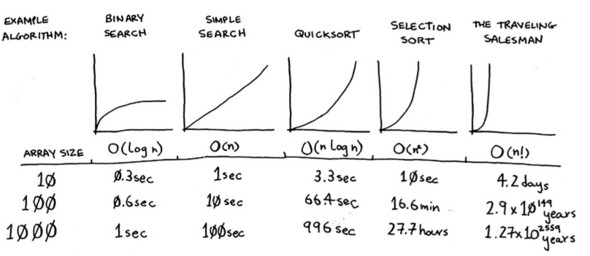
Estimates based on a slow computer that performs 10 operations per second

The example times in this chart are estimates if you perform 10 operations per second. These graphs aren’t precise—they’re just there to give you a sense of how different these run times are. In reality, your computer can do way more than 10 operations per second.

Each run time also has an example algorithm attached. Check out selection sort, which you learned in [chapter 2](ms-local-stream://EpubReader_AC72D530066DA71DBA289EF8C2FE2E4D915D872E9F520716C4ECA9F5D94B14/Content/OEBPS/kindle_split_008.xhtml#ch02). It’s O(*n*2). That’s a pretty slow algorithm. 

There’s another sorting algorithm called *merge sort*, which is O(*n* log *n*). Much faster! Quicksort is a tricky case. In the worst case, quicksort takes O(*n*2) time.

> 这个图表中的例子时间是在你每秒执行10次操作的情况下的估计。这些图表并不精确，它们只是让你感觉到这些运行时间的不同。在现实中，你的电脑每秒能做的操作远远超过10个。
>
> 每个运行时间还附有一个算法的例子。看看选择排序，你在[第2章](ms-local-stream://EpubReader_AC72D530066DA71DBA289EF8C2FE2E4D915D872E9F520716C4ECA9F5D94B14/Content/OEBPS/kindle_split_008.xhtml#ch02)中学习的。它是O(*n*^2^)。这是个相当慢的算法。
>
> 还有一种排序算法叫*merge sort*，它是O(*n* log *n*)。要快得多! Quicksort是一个棘手的案例。在最坏的情况下，quicksort需要O(*n*^2^)时间。

它就像选择排序一样慢! 但这是最坏的情况。在平均情况下，quicksort需要O(*n* log *n*)时间。所以你可能想知道。

- 这里的*最坏情况*和*平均情况*是什么意思？                    
- 如果quicksort平均为O(*n* log *n*)，但合并排序总是O(*n* log *n*)，为什么不使用合并排序？它不是更快吗？

### Merge sort vs. quicksort

Suppose you have this simple function to print every item in a list:

> 假设你有这个简单的函数来打印一个列表中的每一个项目：

In [12]:
def print_items(array):
    for item in array:
        print(item)

This function goes through every item in the list and prints it out. Because it loops over the whole list once, this function runs in O(*n*) time. Now, suppose you change this function so it sleeps for 1 second before it prints out an item:

> 这个函数遍历列表中的每一项，并将其打印出来。因为它在整个列表上循环一次，这个函数的运行时间为O(*n*)。现在，假设你改变了这个函数，让它在打印出一个项目之前休眠1秒：

In [13]:
from time import sleep
def print_items2(array):
    for item in array:
        sleep(1)
        print(item)

Before it prints out an item, it will pause for 1 second. Suppose you print a list of five items using both functions.

> 在它打印出一个项目之前，它将暂停1秒钟。假设你用这两个函数打印一个有五个项目的列表。

Both functions loop through the list once, so they’re both O(*n*) time. Which one do you think will be faster in practice? I think print_items will be much faster because it doesn’t pause for 1 second before printing an item. So even though both functions are the same speed in Big O notation, print_items is faster in practice. When you write Big O notation like O(*n*), it really means this.

> 两个函数都在列表中循环一次，所以它们都是O(*n*)时间。你认为哪一个在实践中会更快？我认为print_items会快得多，因为它在打印一个项目之前不会停顿1秒钟。因此，尽管两个函数在大O符号中的速度相同，但print_items在实践中更快。当你写下O(*n*)这样的大O符号时，它的真正含义是这样的。

c is some fixed amount of time that your algorithm takes. It’s called the *constant*. For example, it might be 10 milliseconds * *n* for print_items versus 1 second * *n* for print_items2. 

You usually ignore that constant, because if two algorithms have different Big O times, the constant doesn’t matter. Take binary search and simple search, for example. Suppose both algorithms had these constants.

> c是你的算法所需要的一些固定的时间量。它被称为*常数*。例如，对于print_items来说，它可能是10毫秒\**n*，而对于print_items2来说是1秒**n*。
>
> 你通常会忽略这个常数，因为如果两个算法有不同的大O时间，这个常数并不重要。以二进制搜索和简单搜索为例。假设两种算法都有这些常数。

You might say, “Wow! Simple search has a constant of 10 milliseconds, but binary search has a constant of 1 second. Simple search is way faster!” Now suppose you’re searching a list of 4 billion elements. Here are the times.

> 你可能会说，"哇！简单查找的常数是10毫秒，但二分查找的常数是1秒。简单搜索要快得多！" 现在假设你要搜索一个有40亿个元素的列表。下面是时间。

As you can see, binary search is still way faster. That constant didn’t make a difference at all.

But sometimes the constant *can* make a difference. Quicksort versus merge sort is one example. Quicksort has a smaller constant than merge sort. So if they’re         both O(*n* log *n*) time, quicksort is faster. And quicksort is faster in practice because it hits the average case way more often than the worst case.

So now you’re wondering: what’s the average case versus the worst case?

> 正如你所看到的，二分查找仍然快得多。这个常数根本就没有产生什么影响。
>
> 但是，有时常数*可以*产生差异。Quicksort与merge sort的对比就是一个例子。Quicksort的常数比merge sort小。所以如果它们都是O(*n* log *n*)时间，那么quicksort更快。而quicksort在实践中更快，因为它在平均情况下比在最坏的情况下更容易出现。
>
> 所以你现在想知道：平均情况和最坏情况的对比是什么？

### Average case vs. worst case

The performance of quicksort heavily depends on the pivot you choose. Suppose you always choose the first element as the pivot. And you call quicksort with an array that is *already sorted.* Quicksort doesn’t check to see whether the input array is already sorted. So it will still try to sort it.

> quicksort的性能在很大程度上取决于你选择的支点。假设你总是选择第一个元素作为支点。你用一个*已经排序的数组调用quicksort。* Quicksort不会检查输入的数组是否已经排序。所以它仍然会尝试进行排序。

Notice how you’re not splitting the array into two halves. Instead, one of the sub-arrays is always empty. So the call stack is really long. Now instead, suppose you always picked the middle element as the pivot. Look at the call stack now.

> 请注意，你没有把数组分成两半。相反，其中一个子数组始终是空的。所以调用栈真的很长。而现在，假设你总是选择中间的元素作为支点。看看现在的调用栈。

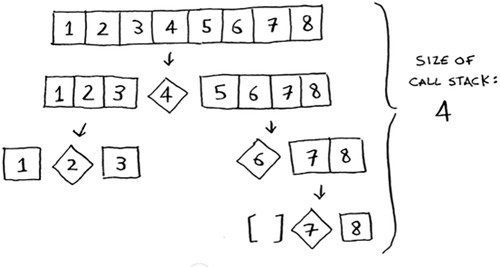

It’s so short! Because you divide the array in half every time, you don’t need to make as many recursive calls. You hit the base case sooner, and the call stack is much shorter.

> 它是如此之短! 因为你每次都把数组分成两半，你不需要做那么多的递归调用。你更快地找到了基本情况，而且调用栈也更短。

The first example you saw is the worst-case scenario, and the second example is the best-case scenario. In the worst case, the stack size is O(*n*). In the best case, the stack size is O(log *n*).      

Now look at the first level in the stack. You pick one element as the pivot, and the rest of the elements are divided into sub-arrays. You touch all eight elements in the array. So this first operation takes O(*n*) time. You touched all eight elements on this level of the call stack. But actually, you touch O(*n*) elements on every level of the call stack.

> 你看到的第一个例子是最坏的情况，而第二个例子是最好的情况。在最坏的情况下，堆栈的大小是O(*n*)。在最好的情况下，栈的大小是O(log *n*)。     
>
> 现在看一下堆栈中的第一层。你挑选一个元素作为支点，其余的元素被分成子数组。你触摸了数组中的所有八个元素。所以这第一个操作需要O(*n*)时间。你触动了这一层调用栈中的所有八个元素。但实际上，你在调用栈的每一层都接触了O(*n*)个元素。

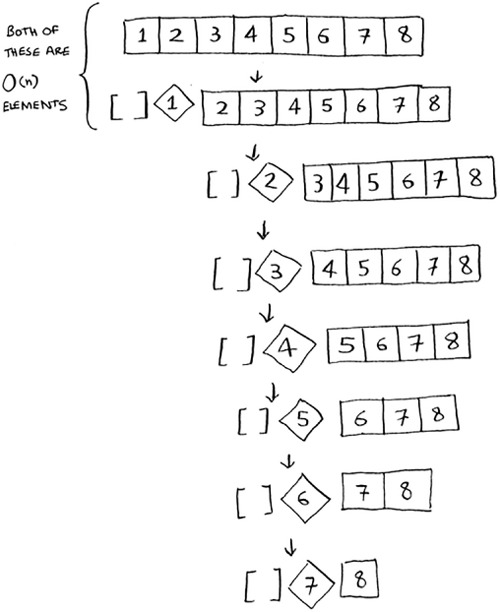

Even if you partition the array differently, you’re still touching O(*n*) elements every time.

> 即使你以不同的方式对数组进行分区，你仍然每次都在接触O(*n*)元素。

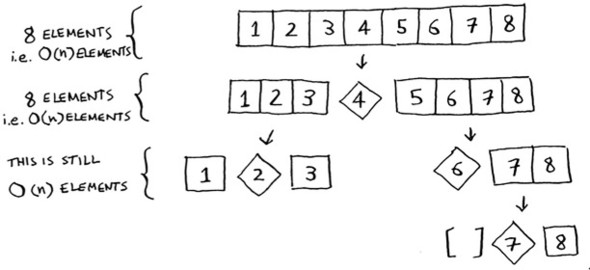

So each level takes O(*n*) time to complete.

> 所以每个关卡需要O(*n*)时间来完成。

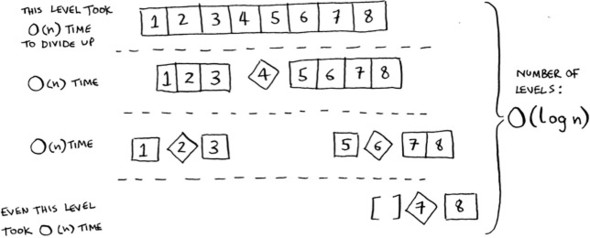

In this example, there are O(log *n*) levels (the technical way to say that is, “The height of the call stack is O(log *n*)”). And each level takes O(*n*) time. The entire algorithm will take O(*n*) * O(log *n*) = O(*n* log *n*) time. This is the best-case scenario.

In the worst case, there are O(*n*) levels, so the algorithm will take O(*n*) * O(*n*) = O(*n*2) time.

Well, guess what? I’m here to tell you that the best case is also the average case. *If you always choose a random element in the array as the pivot*, quicksort will complete in O(*n* log *n*) time on average. Quicksort is one of the fastest sorting algorithms out there, and it’s a very good example of D&C.

> 在这个例子中，有O(log *n*)层（技术上的说法是，"调用栈的高度是O(log *n*)"）。而每一级都需要O(*n*)时间。整个算法将花费O(*n*) * O(log *n*) = O(*n* log *n*) 的时间。这是最好的情况。
>
> 在最坏的情况下，有O(*n*)个级别，所以算法将花费O(*n*) * O(*n*) = O(*n*2)的时间。
>
> 那么，你猜怎么着？我在这里要告诉你，最好的情况也是平均情况。*如果你总是在数组中选择一个随机元素作为支点*，那么quicksort将在O(*n* log *n*)时间内平均完成。Quicksort是目前最快的排序算法之一，它是D&C的一个非常好的例子。

### **Exercises**

How long would each of these operations take in Big O notation? 

**4.5** 

Printing the value of each element in an array.   

**4.6** 

Doubling the value of each element in an array.   

**4.7** 

Doubling the value of just the first element in an array.      

**4.8** 

Creating a multiplication table with all the elements in the array. So if your array is [2, 3, 7, 8, 10], you first multiply every element by 2, then multiply every element by 3, then by 7, and so on.

> 用大O符号表示，这些操作各需要多长时间？
>
> **4.5** 
>
> 打印一个数组中每个元素的值。  
>
> **4.6** 
>
> 将数组中的每个元素的值翻倍。
>
> **4.7** 
>
> 将一个数组中的第一个元素的值翻倍。     
>
> **4.8** 
>
> 用数组中的所有元素创建一个乘法表. 因此，如果你的数组是[2, 3, 7, 8, 10]，你首先将每个元素乘以2，然后将每个元素乘以3，再乘以7，依次类推。

In [4]:
arr = [2, 3, 7, 8, 10]
## 4.5    O(n)
def print_element(arr):
    for element in arr:
        return element

In [6]:
# 4.6    O(n)
def double_element(arr):
    for element in arr:
        return element * 2

In [8]:
# 4.7    O(1)
def double_first_element(arr):
    return arr[0] * 2

In [18]:
# 4.8    O(nlogn)
def multiple_table(arr):
    table = []
    for element in arr:
        for ele in arr[arr.index(element):]:
            table.append(element * ele)
    return table
        
print(multiple_table(arr))

[4, 6, 14, 16, 20, 9, 21, 24, 30, 49, 56, 70, 64, 80, 100]


## Recap

- D&C works by breaking a problem down into smaller and smaller pieces. If you’re using D&C on a list, the base case is probably an empty array or an array with one element.                     
- If you’re implementing quicksort, choose a random element as the pivot. The average runtime of quicksort is O(*n* log *n*)!                     
- The constant in Big O notation can matter sometimes. That’s why quicksort is faster than merge sort.                     
- The constant almost never matters for simple search versus binary search, because O(log *n*) is so much faster than O(*n*) when your list gets big.

> - D&C的工作原理是将问题分解成越来越小的部分。如果你在一个列表上使用D&C，基本情况可能是一个空数组或一个有一个元素的数组。                    
> - 如果你要实现quicksort，选择一个随机元素作为支点。quicksort的平均运行时间是O(*n* log *n*)!                     
> - 大O符号中的常数有时会很重要。这就是为什么quicksort比merge sort快。                    
> - 对于简单查找和二分查找来说，常数几乎不重要，因为当你的列表变大时，O(log *n*)比O(*n*)快很多。